# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Assumptions
1.- The temperature is higher when the latitute ir more close to cero. 

2.-Most of the citites has the % of humidity higher than 40% and it does not have relation (apparently) with the latitude position. 

3.- Most of the cities has their wind speed lower than 6mph. 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key_wheather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
#See the structure of our info
url = 'https://api.openweathermap.org/data/2.5/weather?'
query_url = url + 'q=' + "saskylakh" + '&appid=' + api_key_wheather
data = requests.get(query_url).json()
print (data)

{'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.729, 'pressure': 1007.68, 'humidity': 63, 'temp_min': 285.729, 'temp_max': 285.729, 'sea_level': 1007.68, 'grnd_level': 998.04}, 'wind': {'speed': 3.51, 'deg': 10.771}, 'clouds': {'all': 85}, 'dt': 1563032431, 'sys': {'message': 0.0067, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 32400, 'id': 2017155, 'name': 'Saskylakh', 'cod': 200}


In [17]:
city2 = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cities_dict = {}

url = 'https://api.openweathermap.org/data/2.5/weather?'

print("Start the data retrieval")
print("-----------------------------")
for i in cities:
    query_url = url + 'q=' + i + '&appid=' + api_key_wheather
    data = requests.get(query_url).json()
    if(data['cod'] == 200):
        print("Getting info from " + str(i))
        city2.append(i)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
    else:
        print("City not found. Skipping...")
print("-----------------------------")
print("Finished")


Start the data retrieval
-----------------------------
Getting info from ushuaia
City not found. Skipping...
Getting info from tuktoyaktuk
Getting info from lebu
Getting info from hobart
Getting info from formosa do rio preto
Getting info from dikson
Getting info from vardo
Getting info from saldanha
Getting info from lewistown
Getting info from yinchuan
Getting info from chulman
Getting info from rikitea
Getting info from denpasar
Getting info from cherskiy
Getting info from nikolskoye
Getting info from islamkot
Getting info from lahij
Getting info from lompoc
Getting info from punta arenas
City not found. Skipping...
Getting info from lorengau
Getting info from busselton
City not found. Skipping...
Getting info from mianyang
Getting info from ribeira grande
Getting info from sao joao da barra
Getting info from kamenka
Getting info from lodeynoye pole
City not found. Skipping...
Getting info from provideniya
City not found. Skipping...
Getting info from atuona
Getting info from mahebo

Getting info from thompson
Getting info from caxito
Getting info from wanning
Getting info from akhtubinsk
Getting info from bahia blanca
Getting info from san luis
Getting info from sitka
Getting info from saint-augustin
Getting info from port blair
Getting info from morant bay
Getting info from winsum
Getting info from tabligbo
Getting info from boca do acre
Getting info from mayya
Getting info from pochutla
Getting info from shieli
Getting info from dingle
Getting info from naze
Getting info from posadas
City not found. Skipping...
City not found. Skipping...
Getting info from litovko
Getting info from rawson
Getting info from japura
City not found. Skipping...
City not found. Skipping...
Getting info from kaeo
Getting info from muros
Getting info from comodoro rivadavia
Getting info from nurota
Getting info from port-gentil
Getting info from golden
Getting info from moose factory
Getting info from awjilah
Getting info from gambela
City not found. Skipping...
Getting info from colum

Getting info from calvinia
Getting info from maputo
Getting info from konosha
Getting info from farafangana
Getting info from kadyy
Getting info from nueve de julio
Getting info from bose
Getting info from muyezerskiy
Getting info from muyuka
Getting info from mandiana
Getting info from oxford
Getting info from sokoni
Getting info from champasak
Getting info from ukiah
Getting info from ternate
Getting info from sept-iles
Getting info from mehran
Getting info from shelburne
Getting info from atar
Getting info from kommunisticheskiy
Getting info from puerto leguizamo
Getting info from ust-tsilma
Getting info from vostok
-----------------------------
Finished


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
cities_dict = list(zip(city2,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed))
df = pd.DataFrame(cities_dict,columns=['City','Cloudiness',
                    'Country','Date','Humidity','Lat','Lng',
                        'Max Temp','Wind Speed'])
df.head(10)

#Export to csv
export_csv = df.to_csv ('cities.csv', index = None, header=True)

#### Latitude vs. Temperature Plot

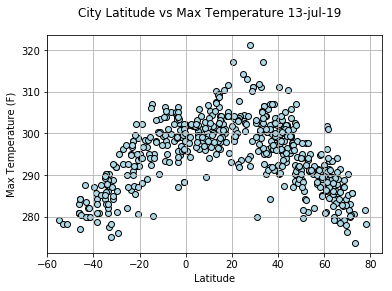

In [43]:
lattemp_plot="lat_vs_temp"
axis_x=df["Lat"]
axis_y=df["Max Temp"]
title="City Latitude vs Max Temperature 13-jul-19"
labelx="Latitude"
labely="Max Temperature (F)"
fig, lattemp_plot = plt.subplots(figsize=(6,4))
fig.suptitle(title, fontsize='12')
    
x = axis_x
y = axis_y

lattemp_plot.scatter(x, y, color='lightblue', marker='o', edgecolors='black')
lattemp_plot.grid()
lattemp_plot.set_xlabel(labelx)
lattemp_plot.set_ylabel(labely)
lattemp_plot.set_xlim([-60,85])

plt.savefig('lat vs max.png',bbox_inches='tight')

#### Latitude vs. Humidity Plot

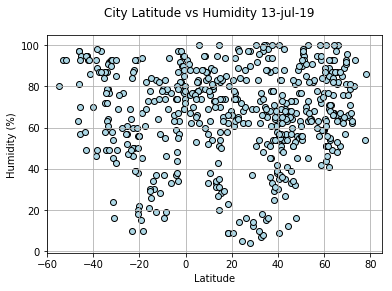

In [44]:
lathum_plot="lat_vs_humidity"
axis_x=df["Lat"]
axis_y=df["Humidity"]
title="City Latitude vs Humidity 13-jul-19"
labelx="Latitude"
labely="Humidity (%)"
fig, lathum_plot = plt.subplots(figsize=(6,4))
fig.suptitle(title, fontsize='12')
    
x = axis_x
y = axis_y

lathum_plot.scatter(x, y, color='lightblue', marker='o', edgecolors='black')
lathum_plot.grid()
lathum_plot.set_xlabel(labelx)
lathum_plot.set_ylabel(labely)
lathum_plot.set_xlim([-60,85])


plt.savefig('lat vs hum.png',bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

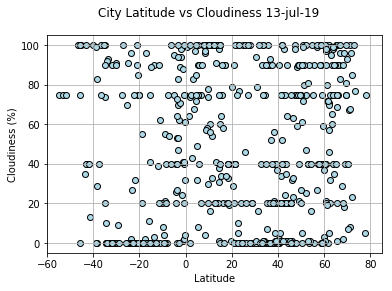

In [45]:
latcloud_plot="lat_vs_cloud"
axis_x=df["Lat"]
axis_y=df["Cloudiness"]
title="City Latitude vs Cloudiness 13-jul-19"
labelx="Latitude"
labely="Cloudiness (%)"
fig, latcloud_plot = plt.subplots(figsize=(6,4))
fig.suptitle(title, fontsize='12')
    
x = axis_x
y = axis_y

latcloud_plot.scatter(x, y, color='lightblue', marker='o', edgecolors='black')
latcloud_plot.grid()
latcloud_plot.set_xlabel(labelx)
latcloud_plot.set_ylabel(labely)
latcloud_plot.set_xlim([-60,85])

plt.savefig('lat vs cloud.png',bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

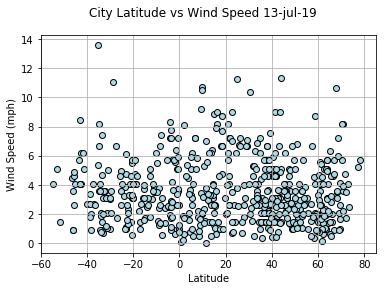

In [46]:

latwind_plot="lat_vs_wind"
axis_x=df["Lat"]
axis_y=df["Wind Speed"]
title="City Latitude vs Wind Speed 13-jul-19"
labelx="Latitude"
labely="Wind Speed (mph)"
fig, latwind_plot = plt.subplots(figsize=(6,4))
fig.suptitle(title, fontsize='12')
    
x = axis_x
y = axis_y

latwind_plot.scatter(x, y, color='lightblue', marker='o', edgecolors='black')
latwind_plot.grid()
latwind_plot.set_xlabel(labelx)
latwind_plot.set_ylabel(labely)
latwind_plot.set_xlim([-60,85])

plt.savefig('lat vs windspeed.png',bbox_inches='tight')